In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

# Import the API key
from config import weather_api_key

# Use the citipy module to determine city/country based on latitude and longitude
from citipy import citipy

# Import the datetime module from the datetime library
from datetime import datetime

In [2]:
# Calling URL for Weather Map API
url = 'http://api.openweathermap.org/data/2.5/weather?' + '&units=Imperial' + '&APPID=' + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=301e2a0e37df04b311a4e670a20a4da2


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

615

In [5]:
# Create an empty list to hold the weather date
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city,
                          'Country': city_country,
                          'Date': city_date,
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping..." + city)
        pass

    # Indicate that Data Loading is complete.

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cururupu
Processing Record 2 of Set 1 | barrow
City not found. Skipping...sorvag
Processing Record 3 of Set 1 | sorvag
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | mehamn
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | bubaque
Processing Record 9 of Set 1 | vaini
City not found. Skipping...bolungarvik
Processing Record 10 of Set 1 | bolungarvik
Processing Record 11 of Set 1 | nangomba
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | pitimbu
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | hongjiang
Processin

Processing Record 36 of Set 4 | kendari
City not found. Skipping...saleaula
Processing Record 37 of Set 4 | saleaula
City not found. Skipping...milingimbi
Processing Record 38 of Set 4 | milingimbi
Processing Record 39 of Set 4 | youghal
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | makakilo city
Processing Record 43 of Set 4 | datia
Processing Record 44 of Set 4 | hare bay
Processing Record 45 of Set 4 | cranbrook
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | orlovskiy
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | zabid
Processing Record 50 of Set 4 | fuengirola
Processing Record 1 of Set 5 | antofagasta
Processing Record 2 of Set 5 | omsukchan
Processing Record 3 of Set 5 | hirara
Processing Record 4 of Set 5 | ust-omchug
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | grosseto

Processing Record 20 of Set 8 | manzanillo
City not found. Skipping...kalomo
Processing Record 21 of Set 8 | kalomo
Processing Record 22 of Set 8 | nerang
Processing Record 23 of Set 8 | skjervoy
Processing Record 24 of Set 8 | faanui
Processing Record 25 of Set 8 | cobourg
Processing Record 26 of Set 8 | alibag
Processing Record 27 of Set 8 | teya
Processing Record 28 of Set 8 | taltal
Processing Record 29 of Set 8 | at-bashi
Processing Record 30 of Set 8 | fort myers beach
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | beverley
Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | mugla
Processing Record 35 of Set 8 | solnechnyy
Processing Record 36 of Set 8 | emerald
Processing Record 37 of Set 8 | bakel
Processing Record 38 of Set 8 | ola
Processing Record 39 of Set 8 | balkanabat
Processing Record 40 of Set 8 | kirgiz-miyaki
Processing Record 41 of Set 8 | saint-georges
Processing Record 42 of Set 8 | palmer
City not found. Skipping.

Processing Record 4 of Set 12 | morgan city
Processing Record 5 of Set 12 | grootfontein
City not found. Skipping...yuzhno-yeniseyskiy
Processing Record 6 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...armacao dos buzios
Processing Record 7 of Set 12 | armacao dos buzios
Processing Record 8 of Set 12 | camacupa
Processing Record 9 of Set 12 | zakamensk
Processing Record 10 of Set 12 | uglich
Processing Record 11 of Set 12 | meadow lake
Processing Record 12 of Set 12 | beba
Processing Record 13 of Set 12 | gorey
Processing Record 14 of Set 12 | cabo rojo
Processing Record 15 of Set 12 | broome
Processing Record 16 of Set 12 | kribi
Processing Record 17 of Set 12 | qingyuan
Processing Record 18 of Set 12 | elko
Processing Record 19 of Set 12 | mandla
Processing Record 20 of Set 12 | tevaitoa
Processing Record 21 of Set 12 | mbeya
Processing Record 22 of Set 12 | swan hill
Processing Record 23 of Set 12 | cajamarca
Processing Record 24 of Set 12 | kurumkan
Processing Record 25 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,cururupu,BR,2021-09-27 01:55:17,-1.8283,-44.8683,75.99,88,16,4.03
1,barrow,US,2021-09-27 01:55:17,71.2906,-156.7887,22.69,85,96,7.16
2,mataura,NZ,2021-09-27 01:55:18,-46.1927,168.8643,52.48,34,5,2.28
3,mehamn,NO,2021-09-27 01:55:19,71.0357,27.8492,49.28,90,100,19.80
4,busselton,AU,2021-09-27 01:55:19,-33.6500,115.3333,61.09,74,55,13.04
5,hermanus,ZA,2021-09-27 01:55:19,-34.4187,19.2345,58.89,90,47,3.31
6,bubaque,GW,2021-09-27 01:55:20,11.2833,-15.8333,82.98,79,99,9.48
7,vaini,TO,2021-09-27 01:55:20,-21.2000,-175.2000,77.16,83,75,6.91
8,nangomba,TZ,2021-09-27 01:55:21,-10.9000,38.5000,68.85,80,49,2.71
9,sao filipe,CV,2021-09-27 01:55:21,14.8961,-24.4956,78.55,81,70,5.46


In [7]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

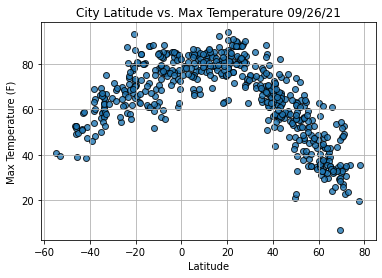

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. max temperature
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

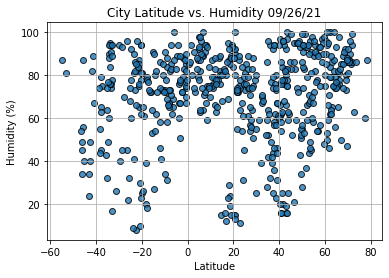

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. humidity
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

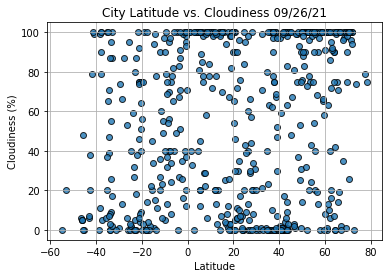

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. cloudiness
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

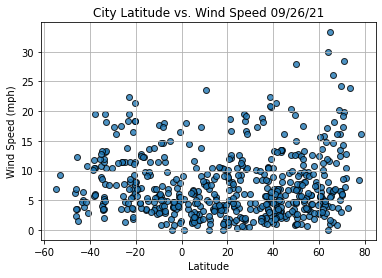

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. cloudiness
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [13]:
# Linear Regression function

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data >> alike scipy (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    A = np.vstack([x_values, np.ones(len(x_values))]).T
    ([slope, intercept], _, _, _,) = np.linalg.lstsq(A, y_values, rcond=None)
    

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [26]:
len(city_data_df['Lat'])

557

In [30]:
len(northern_hemi_df)

383

In [31]:
len(southern_hemi_df)

174

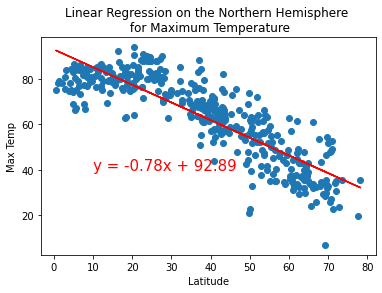

In [44]:
# Linear regression on the Northern Hemisphere Max Temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

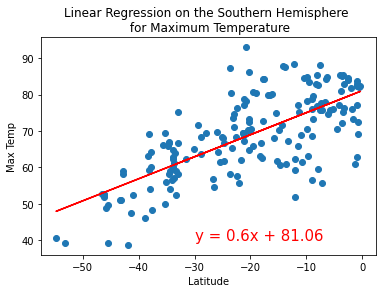

In [45]:
# Linear regression on the Southern Hemisphere Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-30,40))

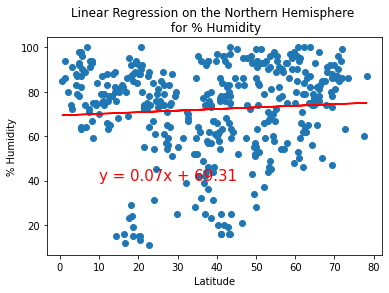

In [57]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(10,40))

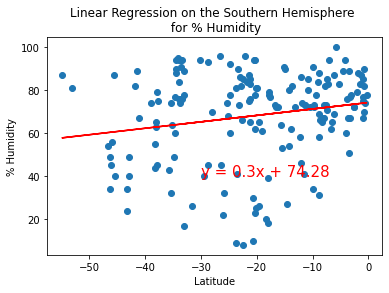

In [56]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-30,40))

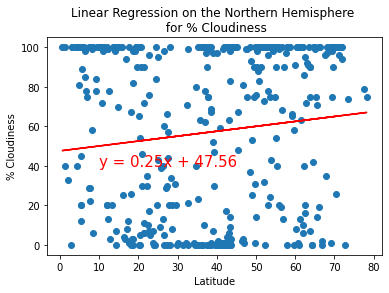

In [55]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,40))

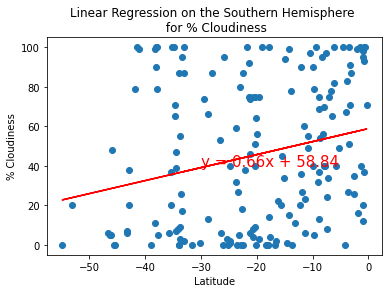

In [54]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-30,40))

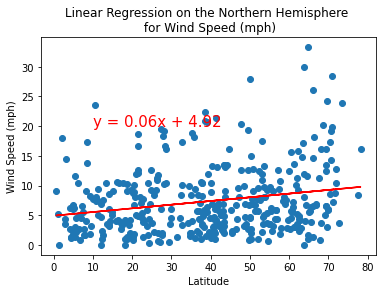

In [61]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)', 
                       'Wind Speed (mph)',(10,20))

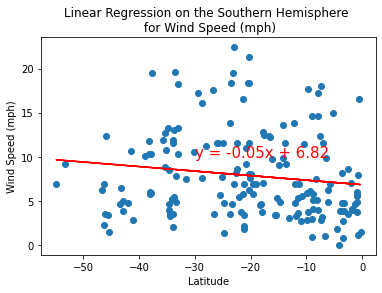

In [60]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)', 
                       'Wind Speed (mph)',(-30,10))